# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [15]:
#imports
import requests
import os
import pandas as pd
import numpy as np
import glob
import random
import base64
import json

from PIL import Image
from io import BytesIO
from IPython.core.display import HTML

In [16]:
import tweepy

In [17]:
#Gather and preview enhanced csv file from direct download source
df_enhanced = pd.read_csv('sources/twitter-archive-enhanced.csv')
df_labba = df_enhanced.copy()
df_enhanced.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [18]:
#Gather and preview breed image prediction tsv file programmatically from url 

#Making directory if it doesn't already exist
folder_name = 'sources'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
               
df_images = pd.read_csv('sources/image-predictions.tsv', sep = '\t')  
df_images.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
I have applied for dev access but has not yet been granted it. Therefor I do it the other way

In [19]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [20]:
#Gather tweet data from Twitter API into Json. 

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [21]:
#final call doing the json 
# I want to catch id (int not str), retweet_count and favorite_count from the tweet-json.txt file

# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for twitter_repostlikes in glob.glob('sources/tweet-json.txt'):
    with open(twitter_repostlikes, encoding='utf-8') as file:
        title = file.readline(10)[:-1] # square minus 1 deletes spaces
        print(title)
        break

{"created


In [22]:
#got this from mentor, 
#Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
df_retweetfav = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('sources/tweet-json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_retweetfav = df_retweetfav.reset_index(drop=True)

/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601

/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601

/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601128187.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retweetfav = df_retweetfav.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_7508/601

In [23]:
df_retweetfav.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Enhanced table assessing

I started with opening in Google Sheets and based on the notes that we are only looking for original tweets with images before August 2017 which has an image I did a pre-clean before assessing. 

1. Merge df_enhanced with df_images and with df_retweetfav - removes tweets with no image and rows with no match
2. Remove all Retweets, first not starting with "This is.." then
3. Remove all tweets before 1st of August 2017

In [24]:
#1. Merge
df_merge = pd.merge(df_enhanced, df_images, on="tweet_id")

df_merge.shape

(2075, 28)

In [25]:
df_merge2 = pd.merge(df_merge, df_retweetfav, on="tweet_id")

df_merge2.shape

(2073, 30)

In [26]:
#2. Drop non-original tweets
df_drop_1 = df_merge2.drop(df_merge2[(df_merge2.text.str.startswith('This is') == False)].index)

#Test
print(df_drop_1.shape) #total rows
print(df_drop_1.text.str.startswith('This is').value_counts()) #should be same as total rows in shape

(1102, 30)
True    1102
Name: text, dtype: int64


In [27]:
#3. Drop tweets before or on 1st of August 2017
df_drop_2 = df_drop_1.drop(df_drop_1[(df_drop_1.timestamp >= '2017-08-01')].index)

#Test
df_drop_2.sort_values(by=['timestamp'], ascending=False).head(1)#should display the post closest to august 2017

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


In [28]:
#Store a copy df_drop_2 in a more descriptive df
df_tweets_wrf = df_drop_2

#Writing to csv - continue visual assessment in Google Sheet
df_tweets_wrf.to_csv('sources/df_tweets_wrf.csv', index=False)

In [29]:
df_tweets_wrf.head(2) #breed_1st_guess, conf_1st_guess, is_dog_1st_guess

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908


In [30]:
df_tweets_wrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 2 to 2071
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1100 non-null   object 
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1100 non-null   object 
 4   source                      1100 non-null   object 
 5   text                        1100 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1100 non-null   object 
 10  rating_numerator            1100 non-null   int64  
 11  rating_denominator          1100 non-null   int64  
 12  name                        1100 non-null   object 
 13  doggo                       1100 

In [31]:
df_tweets_wrf['rating_denominator'].value_counts()

10    1097
50       1
11       1
2        1
Name: rating_denominator, dtype: int64

In [32]:
df_tweets_wrf.duplicated().value_counts()

False    1100
dtype: int64

### Quality issues

Visual assessment done with Google Sheets. 

1. There is 2 columns with only one value in each

2. There are 3 empty columns

3. The dognames are sometimes just a random word

4. Not so describtive column names

5. There are links in text cells

6. +0000 in timestamp can be cleaned out

7. The rating has odd numbers sometimes. They seem to capture the wrong value from the text. 

8. Breed names are mixed lower and uppercase and inconsistent use of dashes


Bonus I have also found that here are a lots of information 28 columns!, I will create one dataset with interesting things, 10 columns for this analysis. 
    <br>WeRateDogs_tweets = name + breed + image + WeRateDogs_rating + text + (number_of_retweets) + (number_of_likes) + link_to_tweet + timestap + tweetid 

Note on more, than we have eg the fact that not all images are dogs and some odd peaks in confidence intervall for the probability numbers. The list can go on but now focus on the above. I have ignored some columns like source and img_num which not necessarily add value for the query to examine original tweets and images.

### Tidiness issues
1. the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo. 

2. Information about one type of observational unit (tweets) is spread across three different files/dataframes.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [64]:
# Make copies of original pieces of data
df_copy = df_tweets_wrf.copy()

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 2 to 2071
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1100 non-null   object 
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1100 non-null   object 
 4   source                      1100 non-null   object 
 5   text                        1100 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1100 non-null   object 
 10  rating_numerator            1100 non-null   int64  
 11  rating_denominator          1100 non-null   int64  
 12  name                        1100 non-null   object 
 13  doggo                       1100 

## Missing and incorrect data

### 1. and 2. Remove reply row and empty columns: 

#### Define: 

1. All empty columns can be removed, and also the row with reply to ID, as when it is a reply to WeRateDog rather than an original tweet from WeRateDog.
--> Remove row where index 1891 with drop function
<br>--> Remove columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id with drop function


In [66]:
#test, search for retweets. Should found none as when I have already done this in the pre-clean step.
print(df_copy.retweeted_status_user_id.isnull().value_counts())
print(df_copy.retweeted_status_timestamp.isnull().value_counts())

True    1100
Name: retweeted_status_user_id, dtype: int64
True    1100
Name: retweeted_status_timestamp, dtype: int64


#### Code

In [67]:
df_copy = df_copy.drop([1891]) 
df_copy = df_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [68]:
#Info should now show null values for names and stages
df_copy.shape #should provide 1099 rows and 23 columns

(1099, 25)

## Tidiness cleaning

### 1. Combine dog stages

#### Define
the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo. 

#### Code

In [69]:
# First replace None in stage columns with empty string as follows.
df_copy.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df_copy.pupper.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df_copy.puppo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df_copy.floofer.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
df_copy['stage'] = df_copy.doggo + df_copy.floofer + df_copy.pupper + df_copy.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
df_copy.loc[df_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
df_copy.loc[df_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
df_copy.loc[df_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [70]:
df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,doggo


### 2. One source for the same data

#### Define
Information about one type of observational unit (tweets) is spread across three different files/dataframes. I have already merged the dataset as a pre-clean step. In this step that becomes more of a quality issue I choose to create a new dataframe based on the merged one for continuous analysis. I will create one dataset with interesting things,
WeRateDogs_tweets = name + breed[combination of p1-p3] + image + WeRateDogs_rating + text + retweet_count + favorite_count + link_to_tweet + timestap + tweetid

#### Code

In [71]:
#Create one column for breed combining the p1-p3 where if true in p1_dog it add that value, if false in p1_dog but true in p2_dog add that value, if false look in p3_dog and if true add that value, else print - 'not a dog'. Using np.select which I found here 
df_copy
conditions = [
    (df_copy['p1_dog'] == True),
    (df_copy['p1_dog'] == False) & (df_copy['p2_dog'] == True),
    (df_copy['p1_dog'] == False) & (df_copy['p2_dog'] == False) & (df_copy['p3_dog'] == True)]
choices = [df_copy['p1'], df_copy['p2'], df_copy['p3']]
df_copy['breed'] = np.select(conditions, choices, default='not a dog')

In [72]:
df_wrd = df_copy.copy()

In [73]:
df_wrd = df_wrd.drop(columns=['source', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'img_num', 'p1', 'p1_conf', 'p1_dog',  'p2', 'p2_conf', 'p2_dog',  'p3', 'p3_conf', 'p3_dog', 'stage'])

In [74]:
# fix order name + breed + image + WeRateDogs_rating + text + (number_of_retweets) + (number_of_likes) + link_to_tweet + timestap +
df_wrd = df_wrd.loc[:, ['name', 'breed', 'jpg_url', 'rating_numerator', 'text', 'retweet_count', 'favorite_count', 'expanded_urls', 'timestamp', 'tweet_id']]

#### Test

In [75]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 2 to 2071
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              1099 non-null   object
 1   breed             1099 non-null   object
 2   jpg_url           1099 non-null   object
 3   rating_numerator  1099 non-null   int64 
 4   text              1099 non-null   object
 5   retweet_count     1099 non-null   object
 6   favorite_count    1099 non-null   object
 7   expanded_urls     1099 non-null   object
 8   timestamp         1099 non-null   object
 9   tweet_id          1099 non-null   object
dtypes: int64(1), object(9)
memory usage: 94.4+ KB


### Quality issues

### 3.  More accurate name or no names of dogs

#### Define

If the word after "This is" is a word starting with a capital letter than fill the cell with that value, else print the string 'No Name'

#### Code

In [105]:
dog_name = [] #new list

for row in df_copy['text']:                          
    if (row[8].isupper()): dog_name.append(row.split(' ')[2].replace('.', ''))
    else:           dog_name.append('anonymous')

In [106]:
#replace name with new list
df_wrd['name'] = dog_name

#### Test

In [107]:
print(df_wrd['name'].tail(10)) #new tail - should state anonymous
print(df_tweets_wrf['name'].tail(10))#old tail - list of words

2043    anonymous
2044    anonymous
2050    anonymous
2051    anonymous
2052    anonymous
2062    anonymous
2066    anonymous
2067    anonymous
2069    anonymous
2071    anonymous
Name: name, dtype: object
2043    quite
2044        a
2050       an
2051        a
2052       an
2062      the
2066       an
2067        a
2069        a
2071        a
Name: name, dtype: object


### 4.  More descriptive column names

#### Define

Columns can have more describtive column names

In [108]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 2 to 2071
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              1099 non-null   object
 1   breed             1099 non-null   object
 2   jpg_url           1099 non-null   object
 3   rating_numerator  1099 non-null   int64 
 4   text              1099 non-null   object
 5   retweet_count     1099 non-null   object
 6   favorite_count    1099 non-null   object
 7   expanded_urls     1099 non-null   object
 8   timestamp         1099 non-null   object
 9   tweet_id          1099 non-null   object
dtypes: int64(1), object(9)
memory usage: 94.4+ KB


#### Code

In [109]:
df_wrd.rename(columns = {'jpg_url':'image', 
                          'rating_numerator':'weratedogs_rating',
                          'expanded_urls':'link_to_tweet'}, inplace = True)

#### Test

In [110]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 2 to 2071
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1099 non-null   object
 1   breed              1099 non-null   object
 2   image              1099 non-null   object
 3   weratedogs_rating  1099 non-null   int64 
 4   text               1099 non-null   object
 5   retweet_count      1099 non-null   object
 6   favorite_count     1099 non-null   object
 7   link_to_tweet      1099 non-null   object
 8   timestamp          1099 non-null   object
 9   tweet_id           1099 non-null   object
dtypes: int64(1), object(9)
memory usage: 94.4+ KB


In [111]:
df_wrd.head()

,name,breed,image,weratedogs_rating,text,retweet_count,favorite_count,link_to_tweet,timestamp,tweet_id
2,Archie,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,12,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,https://twitter.com/dog_rates/status/891815181...,2017-07-31 00:18:03 +0000,891815181378084864
3,Darla,Labrador_retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,13,This is Darla. She commenced a snooze mid meal...,8964,42908,https://twitter.com/dog_rates/status/891689557...,2017-07-30 15:58:51 +0000,891689557279858688
4,Franklin,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,12,This is Franklin. He would like you to stop ca...,9774,41048,https://twitter.com/dog_rates/status/891327558...,2017-07-29 16:00:24 +0000,891327558926688256
8,Zoey,Irish_terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,13,This is Zoey. She doesn't want to be one of th...,4429,28226,https://twitter.com/dog_rates/status/890609185...,2017-07-27 16:25:51 +0000,890609185150312448
9,Cassie,Pembroke,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,This is Cassie. She is a college pup. Studying...,7711,32467,https://twitter.com/dog_rates/status/890240255...,2017-07-26 15:59:51 +0000,890240255349198849


### 5. Remove tiny url in text

#### Define

Remove all strings starting with 'https'

#### Code

In [112]:
df_wrd['text'] = df_wrd['text'].str.replace('http[^\s]*','')

/var/folders/9w/5fhdh83j5_qcyqt44p863h_40000gn/T/ipykernel_3438/843778878.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_wrd['text'] = df_wrd['text'].str.replace('http[^\s]*','')


#### Test

In [113]:
pd.options.display.max_colwidth = 300
df_wrd['text'].head(1)

2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
Name: text, dtype: object

### 6. Remove +0000 in timestamp

#### Define

Using datetime just make it a bit more readable

#### Code

In [114]:
df_wrd['timestamp'] = pd.to_datetime(df_wrd['timestamp']).dt.tz_convert(None)

#### Test

In [115]:
df_wrd['timestamp'].head(1)

2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

### 7. Right rating

#### Define
Any number under 7 or above 13 seems to be wrong. They seem to capture the wrong value from the text. I will try with another method to see if it performs better


#### Code

In [116]:
df_wrd['rating'] = df_wrd['text'].str.extract(r'(\d+(?=\/10))')


#### Test

In [117]:
df_wrd['weratedogs_rating'].value_counts() # old rating

12      271
11      235
10      215
13      148
9        75
8        59
7        32
6        14
5        13
14       12
3         9
4         6
2         5
27        1
1776      1
75        1
50        1
1         1
Name: weratedogs_rating, dtype: int64

In [118]:
df_wrd['rating'].value_counts() # new rating

12      271
11      236
10      216
13      148
9        76
8        59
7        31
6        14
5        13
14       12
3         9
4         6
2         5
75        1
27        1
1776      1
Name: rating, dtype: int64

##### Comment on the result

It is better though not perfect. 1776 is real and should be 1776.  But eg 75 and 27 is because in those cases they rank the dog with a decimal and the script only capture up until that '.' This could be fixed as well but for this project I choose to not fix that too. 
The script also only look at what is before /10 to eg exclude typing 50/50 but if the text might would mention /10 before the rating it would be misleading here. 

### 8. Consistent pattern for breeds

#### Define
Breed names are mixed lower and uppercase and inconsistent use of dashes

#### Code

In [119]:
df_wrd['breed'] = df_wrd['breed'].str.title().replace({'_': ' ', '-': ' '}, regex=True)

#### Test

In [120]:
df_wrd['breed']

2                  Chihuahua
3         Labrador Retriever
4                     Basset
8              Irish Terrier
9                   Pembroke
                ...         
2062        Golden Retriever
2066               Not A Dog
2067    Bernese Mountain Dog
2069     Rhodesian Ridgeback
2071                 Redbone
Name: breed, Length: 1099, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [121]:
df_wrd.to_csv('sources/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [203]:
import matplotlib.pyplot as plt
popular_tweet_breed = df_wrd.groupby('breed', as_index = False)['tweet_id'].count().sort_values(by='tweet_id', ascending=False)
popular_tweet_breed
#most favored breed

,breed,tweet_id
74,Not A Dog,143
42,Golden Retriever,89
78,Pembroke,57
25,Chihuahua,51
59,Labrador Retriever,47
...,...,...
54,Japanese Spaniel,1
52,Irish Wolfhound,1
88,Scottish Deerhound,1
82,Rhodesian Ridgeback,1


In [252]:
#most retweeted
retweeted_breeds = df_wrd.groupby('breed', as_index = False)['retweet_count'].sum().sort_values(by='retweet_count', ascending=False)
print(retweeted_breeds)
favorite_counts = df_wrd.groupby('day', as_index = False)['favorite_count'].sum().sort_values(by='favorite_count', ascending=False)
print(favorite_counts)


                      breed  retweet_count
42         Golden Retriever         374661
74                Not A Dog         346295
78                 Pembroke         178332
25                Chihuahua         170716
59       Labrador Retriever         164837
..                      ...            ...
54         Japanese Spaniel            471
48             Ibizan Hound            403
18        Brabancon Griffon            196
82      Rhodesian Ridgeback            147
9   Black And Tan Coonhound             44

[110 rows x 2 columns]
         day  favorite_count
6  Wednesday         1850363
1     Monday         1754081
5    Tuesday         1672817
4   Thursday         1548642
3     Sunday         1340028
0     Friday         1323807
2   Saturday         1183149


In [243]:
df_wrd['day'] = df_wrd['timestamp'].dt.day_name()

In [244]:
ab

,day,tweet_id
0,Friday,149
1,Monday,168
2,Saturday,151
3,Sunday,131
4,Thursday,157
5,Tuesday,168
6,Wednesday,175


In [242]:
ab.sort_values(by=['day'])

,day,tweet_id
0,Friday,149
1,Monday,168
2,Saturday,151
3,Sunday,131
4,Thursday,157
5,Tuesday,168
6,Wednesday,175


In [148]:
tweet_counts = df_wrd['tweet_id'].count()
tweet_counts

1099

In [152]:
breeds_unique = df_wrd['breed'].value_counts()
breeds_unique

Not A Dog              143
Golden Retriever        89
Pembroke                57
Chihuahua               51
Labrador Retriever      47
                      ... 
Clumber                  1
Briard                   1
Leonberg                 1
Irish Terrier            1
Rhodesian Ridgeback      1
Name: breed, Length: 110, dtype: int64

### Insights:
1. The most popular breed is actually no breed - or at least according to the AI. 

2. Golden Retrieve is the most popular retweeted breed though and beetw no breed labeled 

3. Most popular day of week to tweet is Wednesday and least is Sunday. Wednesday is also the day people favorite WeRateDogs the most

### Visualization

Text(0.5, 1.0, 'Concise Date Formatter')

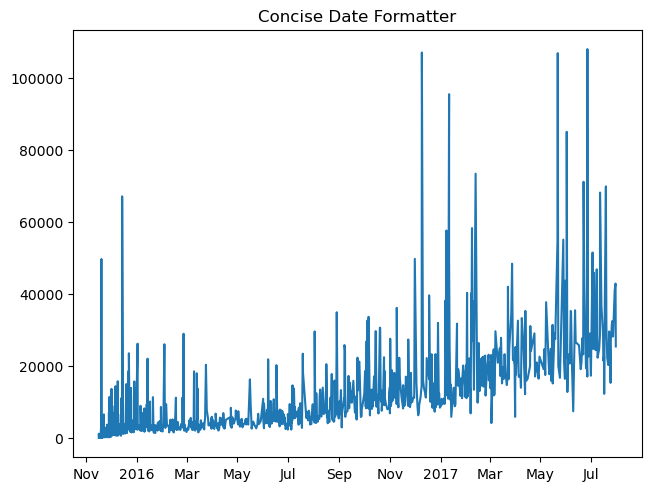

In [253]:
#showing how favoriting We Rate Dogs has changed over time
import datetime
import matplotlib.dates as mdates

base = datetime.datetime(2005, 2, 1)
dates = np.array([base + datetime.timedelta(hours=(2 * i))
                  for i in range(732)])
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, ax = plt.subplots(constrained_layout=True)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot(df_wrd['timestamp'], df_wrd['favorite_count'])
ax.set_title('Concise Date Formatter')

#plt.plot(df_wrd['favorite_count'], df_wrd['timestamp'])